# Nombre del Proyecto: <br> Análisis de Perdida (CHURN) de Consumidores en una empresa <br> de Telecomunicaciones

## (1) Recolección de Datos

### (1.1) Importamos las librerias necesarias y el Data Frame CHURN

In [1]:
# Librerias
import numpy as np              # Algebra Lineal
import pandas as pd             # Procesamiento de datos
import matplotlib.pyplot as plt # Visualización
import seaborn as sns           # Visualización
import re

# Importamos la base de datos Telco-Churn
dfChurn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', sep = ',')

### (1.2) Imprimimos los 5 primeros datos del Data Frame

In [2]:
dfChurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## (2) Pre-Procesamiento

### (2.1) Vista General del Data Frame

In [3]:
print ("Data Frame CHURN\n (Filas, Columnas)  : " ,dfChurn.shape)
print ("\nVariables  :\n" ,dfChurn.columns.tolist())
print ("\nValores Perdidos  :  ", dfChurn.isnull().sum().values.sum())
print ("\nValores Unicos  :  \n",dfChurn.nunique())

Data Frame CHURN
 (Filas, Columnas)  :  (7043, 21)

Variables  :
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Valores Perdidos  :   0

Valores Unicos  :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


### (2.2) Limpieza de Datos

In [4]:
# Haremos los siguientes cambios para la variable "TotalCharges"
# Remplazo de Cadenas Vacias por NaNs
dfChurn['TotalCharges'] = dfChurn["TotalCharges"].replace(" ",np.nan)
# Quitamos los NaNs del Data Frame
dfChurn = dfChurn[dfChurn["TotalCharges"].notnull()]
dfChurn = dfChurn.reset_index()[dfChurn.columns]
# Convertimos la variable a tipo float
dfChurn["TotalCharges"] = dfChurn["TotalCharges"].astype(float)

# En la variable "SeniorCitizen" hacemos una recodificación de la variable
dfChurn["SeniorCitizen"] = dfChurn["SeniorCitizen"].replace({1:"Yes",0:"No"})

# Generamos una funcion para codificar de manera categorica la variable "Tenure"
def tenure_cat(dfChurn) :    
    if dfChurn["tenure"] <= 12 :
        return "(0-12)"
    elif (dfChurn["tenure"] > 12) & (dfChurn["tenure"] <= 24 ):
        return "(12-24)"
    elif (dfChurn["tenure"] > 24) & (dfChurn["tenure"] <= 48) :
        return "(24-48)"
    elif (dfChurn["tenure"] > 48) & (dfChurn["tenure"] <= 60) :
        return "(48-60)"
    elif dfChurn["tenure"] > 60 :
        return "(+60)"
# Creamos la variable "tenure_cat" usando la función de que codifica la data de la variable "tenure"
dfChurn["tenure_cat"] = dfChurn.apply(lambda dfChurn:tenure_cat(dfChurn),
                                      axis = 1)

# Remplazamos la etiqueta "No internet service" por "No" para las siguientes variables
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    dfChurn[i]  = dfChurn[i].replace({'No internet service' : 'No'})

## (3) Extracción de Caracteristicas

### (3.1) Analisis Exploratorio - Correlación

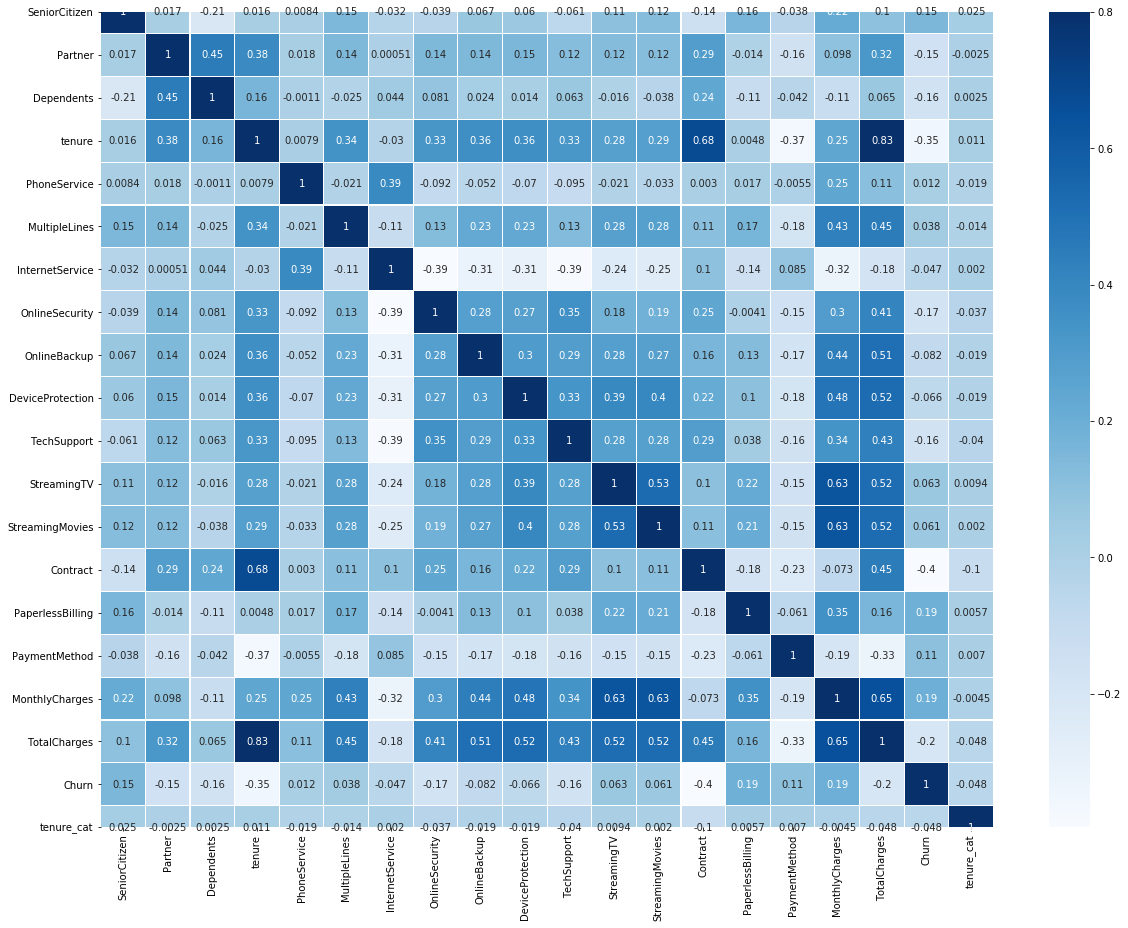

In [37]:
# Grafica de Correlación
corrmat = dfChurn.drop(['customerID', 'gender'], axis=1)
corrmat = corrmat.corr()
f, ax = plt.subplots(figsize=(20, 15))
colormap = plt.cm.Blues
sns.heatmap(corrmat, linewidths=0.1, cmap = colormap, linecolor = 'White', vmax=0.8, annot=True)

### (3.2) Analisis Exploratorio - Variables Categoricas ___(NoChurn, Churn, Total)___
Graficaremos cada un de las variables categoricas cortada por No Churn vs Churn vs Total de la base

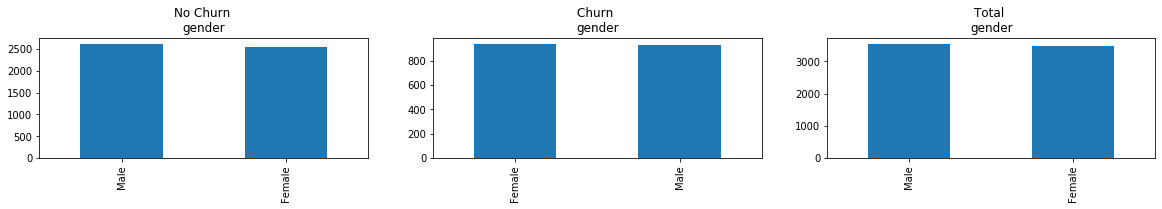

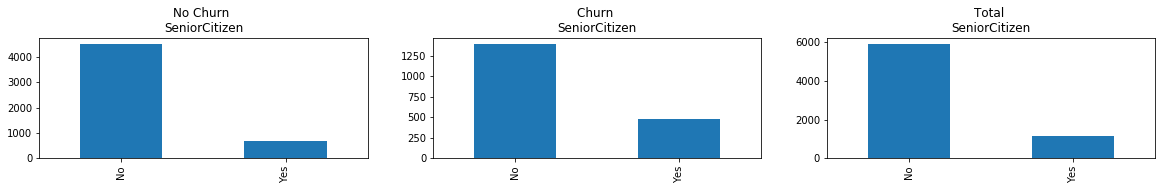

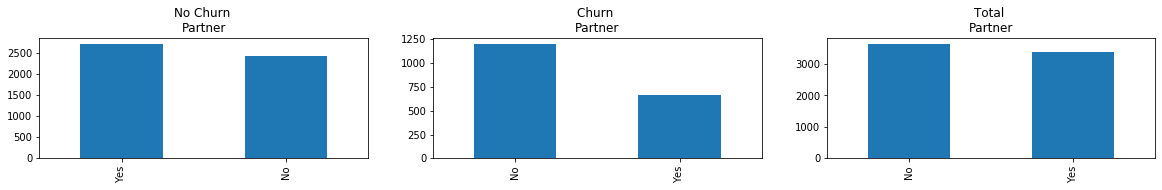

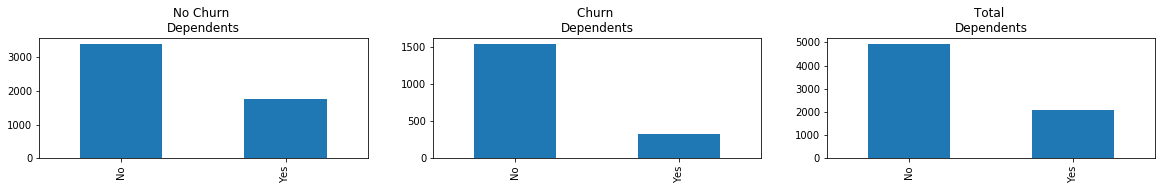

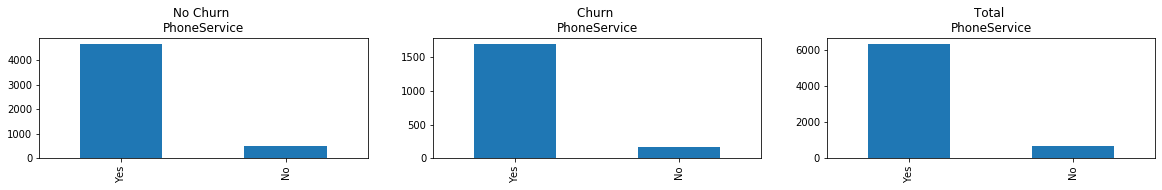

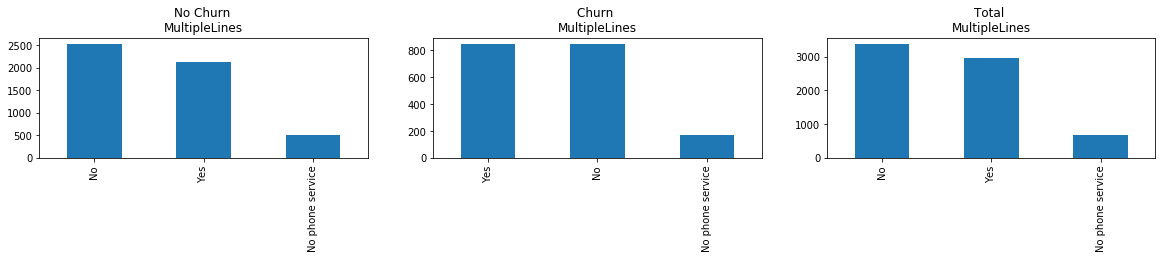

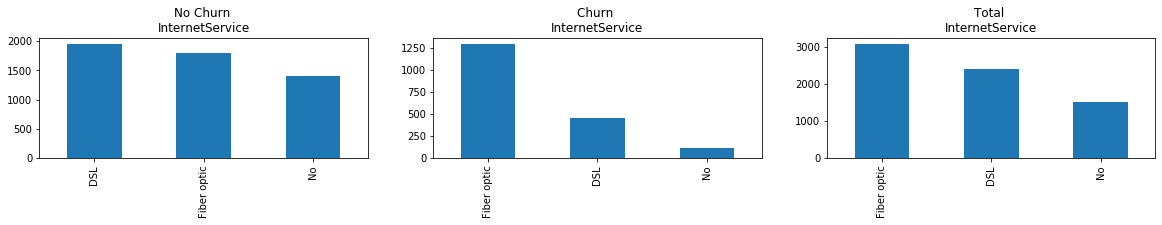

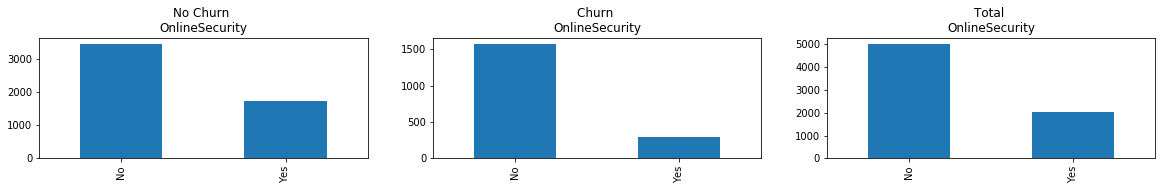

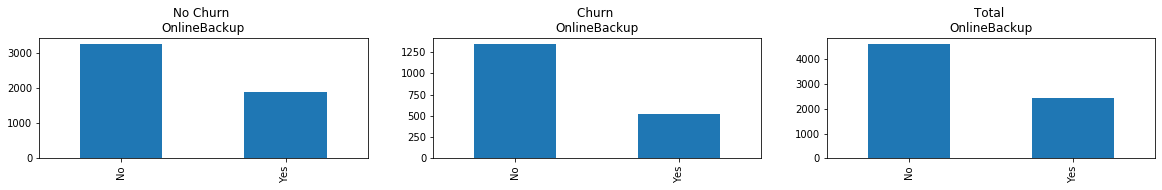

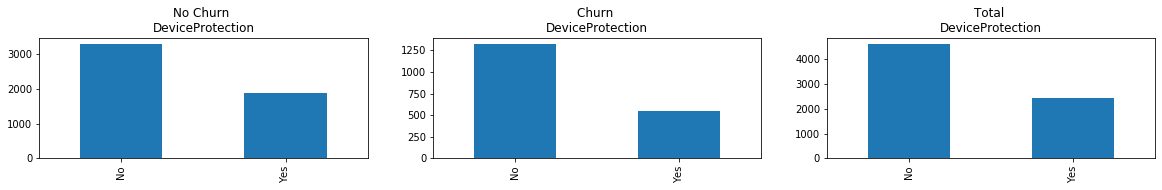

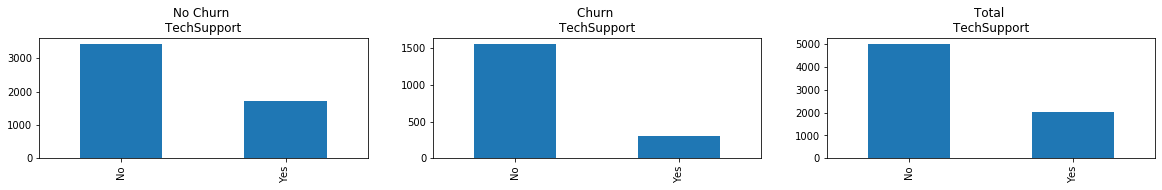

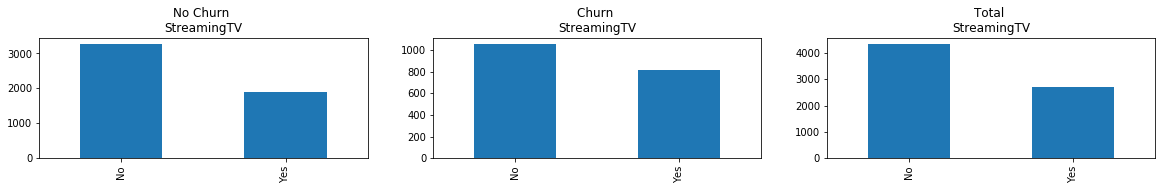

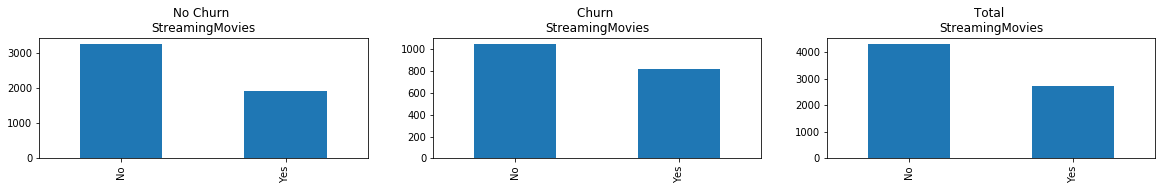

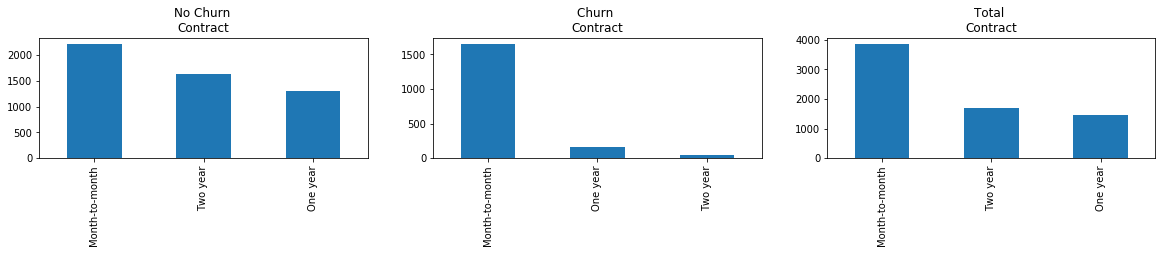

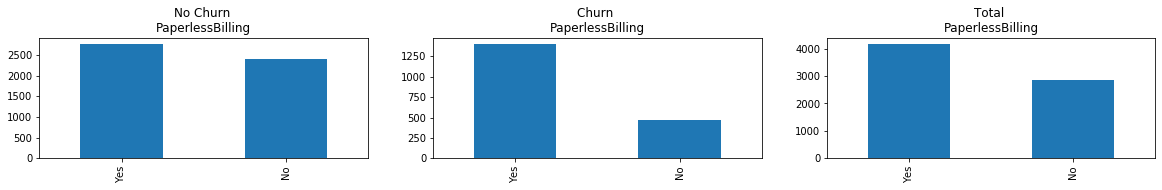

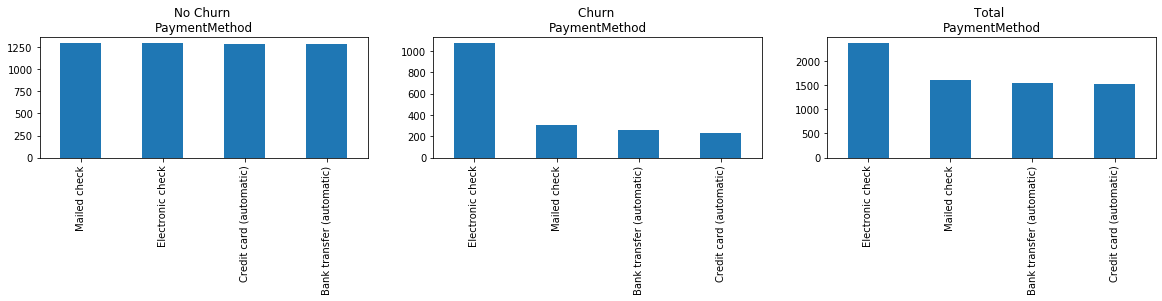

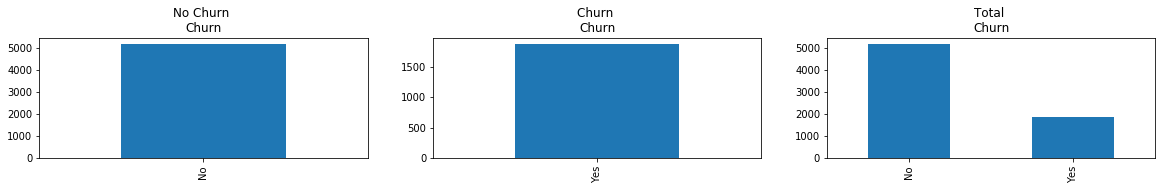

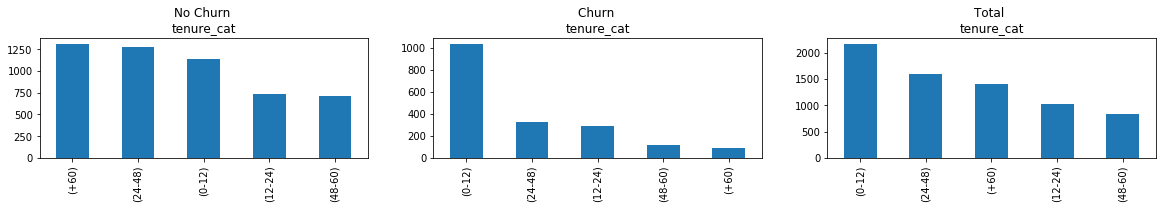

In [5]:
# Generamos una base solo con variables Categoricas
strColumns = dfChurn.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)

# Generamos un loop que nos pinte todas las graficas de las variables categoricas
for i in range(1,strColumns.shape[1]):
    
    rows = strColumns.shape[1]
    cols = 3
    plt.rcParams["figure.figsize"] = (20,50)
    
    # Generamos las graficas para No Churn
    strVarNoChurn = strColumns[strColumns["Churn"] == "No"].iloc[: ,i].value_counts()
    plt.subplot(rows,cols,(i * cols - 2))
    strVarNoChurn.plot(kind='bar')
    plt.title("No Churn \n" + strVarNoChurn.name)
    
    # Generamos las graficas para Churn
    strVarChurn = strColumns[strColumns["Churn"] == "Yes"].iloc[: ,i].value_counts()
    plt.subplot(rows,cols,(i * cols - 1))
    strVarChurn.plot(kind='bar')
    plt.title("Churn \n" + strVarChurn.name)
    
    # Generamos las graficas para Total
    strVarTot = strColumns.iloc[: ,i].value_counts()
    plt.subplot(rows,cols,(i * cols))
    strVarTot.plot(kind='bar')
    plt.title("Total \n" + strVarTot.name)

    plt.show()

### (3.3) Analisis Exploratorio - Variables Continuas ___(NoChurn, Churn, Total)___
Generaremos una tabla descriptiva de cada un de las variables continuas cortada por No Churn vs Churn vs Total de la base

In [6]:
print('\n No Churn: \n',
      dfChurn[dfChurn["Churn"] == "No"][['tenure', 'MonthlyCharges', 'TotalCharges']].describe())
print('\n Churn: \n',
      dfChurn[dfChurn["Churn"] == "Yes"][['tenure', 'MonthlyCharges', 'TotalCharges']].describe())
print('\n Total: \n',
      dfChurn[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())


 No Churn: 
            tenure  MonthlyCharges  TotalCharges
count  5163.00000     5163.000000   5163.000000
mean     37.65001       61.307408   2555.344141
std      24.07694       31.094557   2329.456984
min       1.00000       18.250000     18.800000
25%      15.00000       25.100000    577.825000
50%      38.00000       64.450000   1683.600000
75%      61.00000       88.475000   4264.125000
max      72.00000      118.750000   8672.450000

 Churn: 
             tenure  MonthlyCharges  TotalCharges
count  1869.000000     1869.000000   1869.000000
mean     17.979133       74.441332   1531.796094
std      19.531123       24.666053   1890.822994
min       1.000000       18.850000     18.850000
25%       2.000000       56.150000    134.500000
50%      10.000000       79.650000    703.550000
75%      29.000000       94.200000   2331.300000
max      72.000000      118.350000   8684.800000

 Total: 
             tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.

## (4) Selección de Caracteristicas

In [7]:
# Cargamos la libreria LabelEncoder 
from sklearn.preprocessing import LabelEncoder
dfChurn.dtypes
cat_mask = (dfChurn.dtypes == object) 
cat_cols = dfChurn.columns[cat_mask].tolist() 
le = LabelEncoder()
# Aplicamos el LabelEncoder a las variables Categoricas
dfChurn[cat_cols] = dfChurn[cat_cols].apply(lambda x: le.fit_transform(x))
print(dfChurn[cat_cols].head())

   customerID  gender  SeniorCitizen  Partner  Dependents  PhoneService  \
0        5365       0              0        1           0             0   
1        3953       1              0        0           0             1   
2        2558       1              0        0           0             1   
3        5524       1              0        0           0             0   
4        6500       0              0        0           0             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             1   
1              0                0               1             0   
2              0                0               1             1   
3              1                0               1             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0        

## (5) Creación de Modelos
En este punto generaremos un set de entrenamiento (70%) y otro de prueba (30%) para poder generar nuestros modelos

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Creamos la matriz de las X's y el vector de estiquetas y
X = dfChurn.drop(["Churn", "gender", "customerID"],axis=1)
y = dfChurn["Churn"]

# Seleccionaremos la semilla que se va a usar
setSeed = 3013

# Usaremos un 70%, 30% para el entrenamiento y prueba delmodelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = setSeed)

#Definimos la variable Cross Validation, que usara en las funciones de Grid Search
crossValidation = 10
nData_cv = np.round(X_train.shape[0]/crossValidation,0)
print('Numero de observaciones que contendra cada uno de los ' + str(crossValidation) +
      ' cortes de la variable crossValidation: ' + str(nData_cv))


Numero de observaciones que contendra cada uno de los 10 cortes de la variable crossValidation: 492.0


En este punto generaremos una función que nos ayude a seleccionar el top 10 de los modelos ganadores luego que usamos la funcion de GridSearchCV y a estos modelos les sacaremos sus metricas de prueba para contrastar resultados

In [61]:
# Generamos una función que constraste regrese el top 10 de los modelos con sus metricas de prueba
def metrics_train_test(X_train, y_train, X_test, y_test, 
            model_cv, modelNumber, modelType,
            fnModel, modelArguments):
    '''
    Esta funcón regresa un data frame con el top 10 de los modelos que se corrieron usando la funcion 
    GridSearchCV, y contrasta los resultados de entrenamiento vs las metricas de prueba
         
         --------  Parametros de la función  --------
         
    X_train:        Matriz X's de entrenamiento 
    y_train:        Vector y de entrenamiento 
    X_test:         Matriz X's de prueba
    y_test:         Vector y de prueba  
    model_cv:       Modelo que se uso para correr CrossValidation
    modelNumber:    Numero de modelo (es un valor cadena), opcional
    modelType:      Nombre del modelo (es un valor cadena), opcional
    fnModel:        Tipo de modelo que se desea contrastar
    modelArguments: Argumentos adicionales para meter en el modelo que se desea contrastar
    '''
    
    # Generamos el data frame de los resultados del top 10 de los modelos
    cv_results = pd.DataFrame(model_cv.cv_results_)
    cv_results = cv_results.sort_values(by=['mean_test_score'], ascending=[False]).reset_index(drop=True)
    cv_results['rank'] = cv_results.index +  1
    cv_results = cv_results[cv_results['rank'] < 11]

    # Generamos una variable llamada model que tendra el nombre del modelo y ranking
    cv_results['x1'] = ['('+ modelNumber +'.'] * cv_results.shape[0]
    cv_results['x2'] = [') '+ modelType] * cv_results.shape[0]
    cv_results['model'] = cv_results['x1'] + cv_results['rank'].astype(str) + cv_results['x2']
    
    # Generamos una lista de los parametros a evaluar en el modelo y un vector vacia para gaurdar
    # los resultados de las metricas de prueba
    parametersList = cv_results['params'].tolist()
    test_metrics = []
    
    # Hacemos un loop para iterar sobre todos los parametros
    for value in parametersList:
        # Creamos el modelo y lo ajustamos
        modelo = fnModel(**modelArguments, **value)
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        # Metricas de Validación
        acc = accuracy_score(y_test, y_pred)
        pre = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = 2 * ((pre * rec) / (pre + rec))
        # Generamos un objeto donde guardaremos las metricas
        test_metrics.append({
                             'params': value,
                             'Accuracy_test': acc,
                             'Recall_test': rec,
                             'Precision_test': pre,
                             'F1_test': f1
                          })
    # Creamos un data frame con los resultados evaluados anteriormente
    test_metrics = pd.DataFrame(test_metrics)
    
    # Unimos la información de las metricas de prueba con los resultados del top 10 de los modelos
    cv_results = cv_results.join(test_metrics, lsuffix='_cv', rsuffix='_metrics')
    cv_results = cv_results.drop('params_metrics', axis=1)
    
    # Creamos la lista de las variables que contendran el data frame obtenido
    paramList = list(filter(re.compile("param.*").match, cv_results.columns.tolist()))
    modelList = ['model', 'rank']
    metricsList = ['mean_test_score', 'Accuracy_test', 'Recall_test', 'Precision_test', 'F1_test']
    cvList =  modelList + paramList + metricsList
    
    # Regresamos un data frame con la información del top 10 de los modelos
    return cv_results[cvList]

Aquí estamos creando una función para graficar los scores obtenidos por cada parametro tanto de los datos de entenamiento como los de prueba

In [114]:
def plot_train_test(dfResults, modelName='Modelo'):
    ''''''
    # Definición de Variables
    best_params = dfResults[dfResults['rank']== 1]['params_cv'].tolist()
    best_sc = dfResults[dfResults['rank']== 1]['mean_test_score'].tolist()
    train_sc = dfResults['mean_test_score'].tolist()
    test_sc = dfResults['Accuracy_test'].tolist()
    rango = range(0,len(dfResults['params_cv'].tolist()))
    
    # Generación del grafico
    plt.figure(figsize = (20,10))
    plt.plot(rango, train_sc, rango , test_sc)
    plt.hlines(best_sc, np.min(rango), np.max(rango), 
               color='grey', linewidth=1, linestyle='dotted')
    plt.xticks(rango, dfResults['params_cv'].tolist(), rotation=90)
    plt.title(modelName +
              '\n Mejores Parametros: {}'.format(best_params) +
              '\n Mejor Accuracy: {}'.format(best_sc))
    plt.legend(("Entrenamiento", "Prueba"))
    plt.ylabel('Accuracy')
    plt.xlabel('Parametros')
    
    return plt.show()

def plot_bar_train_test(dfResults, modelName='Modelo'):
    ''''''
    # Definición de Variables
    n = dfResults.shape[0]
    best_params = dfResults[dfResults['rank']== 1]['params_cv'].tolist()
    best_sc = dfResults[dfResults['rank']== 1]['mean_test_score'].tolist()
    train_sc = dfResults['mean_test_score'].tolist()
    test_sc = dfResults['Accuracy_test'].tolist()
    labelModel =  dfResults['model'].astype(str) + '\n' 
    labelParams = dfResults['params_cv'].astype(str) + '\n'
    labelAccTrain = ['Accuracy Entrenamiento : ']* n + np.round(dfResults['mean_test_score'],4).astype(str) + '\n'
    labelAccTest =  ['Accuracy Prueba: ']* n + np.round(dfResults['Accuracy_test'],4).astype(str) + '\n'
    desc = labelModel + labelParams + labelAccTrain + labelAccTest
    rango = dfResults.index
    bar_width = 0.35

    #Grafica de Barras
    plt.figure(figsize = (15,7))
    plt.bar(rango, train_sc, bar_width, label="Entrenamiento")
    plt.bar(rango + bar_width, test_sc, bar_width, label="Prueba")
    plt.hlines(best_sc, np.min(rango), np.max(rango), color='black', linewidth=2, linestyle='dotted')
    plt.ylim((0.2, 1.05))
    plt.xticks(rango + bar_width / 2, desc, rotation=90)
    plt.legend()
    plt.title(modelName)
    plt.ylabel('Accuracy')

    return plt.show()

### (5.1) Regresión Logistica
**1.-** En este punto crearemos un modelo de regresión Logistica
###### Hiperparámetros:
* **Regularización Lasso (L1):** en esta regularización, la complejidad C se mide como la media del valor absoluto de los coeficientes del modelo. <br> Lasso sirve de ayuda cuando sospechamos que varios de los atributos de entrada (features) sean irrelevantes.
* **Regularización Ridge (L2):** en esta regularización, la complejidad C se mide como la media del cuadrado de los coeficientes del modelo. <br> Ridge nos va a servir de ayuda cuando sospechemos que varios de los atributos de entrada (features) estén correlados entre ellos.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Generamos una variable con el nobre del modelo
modelNumber = '5.1'
modelType = 'Regresión Logistica'
modelName = '(' + modelNumber + ') ' + modelType

# Inicializamos los parametros que se usaran para evaluar los modelos de Regresion Logistica
C_vals = np.logspace(-5, 5, 100)
param_grid = {
    'C': C_vals, 
    'penalty': ['l2', 'l1']
}

**2.-** Incializamos el modelo, correremos todos los parametros definidos en el punto anterior usando la función de GridSearch y ajustamos el modelo

In [11]:
# Inicializamos la Regresión Logistica
lr = LogisticRegression(max_iter=1000, random_state=setSeed, solver='liblinear')

# Incializamos in GridSearch para definir los mejores parametro
lr_cv = GridSearchCV(lr, param_grid, cv = crossValidation)

# Ajustamos la data de entrenamiento
lr_cv.fit(X_train, y_train)

**3.-** Una vez obtenidos los resultados del GridSearch corremos la función **metrics_train_test()** para obtener los resultados del top 10 de los modelos

In [117]:
# Argumentos adicionales del modelo no incluidos en la variable param_grid
lrArgs = {'max_iter': 1000, 'random_state': setSeed, 'solver': 'liblinear'}

# Corremos la función que nos ayudara a obtener el top 10 delosmodelos
lrTop10 = metrics_train_test(X_train, y_train, X_test, y_test, 
                             lr_cv, modelNumber, modelType,
                             LogisticRegression,lrArgs)
lrTop10.head(5)

,model,rank,param_C,param_penalty,params_cv,mean_test_score,Accuracy_test,Recall_test,Precision_test,F1_test
0,(5.1.1) Regresión Logistica,1,0.0432876,l2,"{'C': 0.04328761281083057, 'penalty': 'l2'}",0.802727,0.808057,0.554404,0.685897,0.613181
1,(5.1.2) Regresión Logistica,2,0.0689261,l2,"{'C': 0.06892612104349695, 'penalty': 'l2'}",0.801915,0.806161,0.545769,0.683983,0.607109
2,(5.1.3) Regresión Logistica,3,0.138489,l2,"{'C': 0.13848863713938717, 'penalty': 'l2'}",0.801102,0.804739,0.544041,0.680346,0.604607
3,(5.1.4) Regresión Logistica,4,0.10975,l2,"{'C': 0.10974987654930568, 'penalty': 'l2'}",0.800898,0.805687,0.545769,0.682505,0.606526
4,(5.1.5) Regresión Logistica,5,0.0271859,l2,"{'C': 0.027185882427329403, 'penalty': 'l2'}",0.800695,0.807583,0.554404,0.684435,0.612595


**4.-** Graficaremos los resultados de cada uno de los parametros usando la data entrenamiento contra la data de prueba

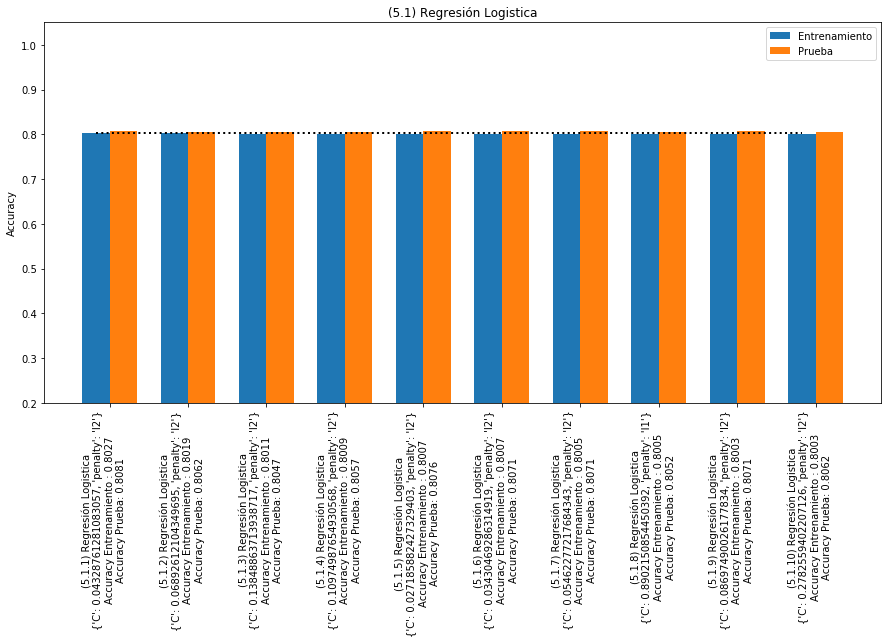

In [116]:
# corremos la grafica con los resultados del top 10
plot_bar_train_test(lrTop10, modelName)

### (5.2) Random Forest
**1.-** En este punto crearemos un modelo de Random Forest
###### Hiperparámetros:
* **n_estimators:** numero de arboles
* **max_features:** numero máximo de features considerados para dividir un nodo
* **max_depth:** numero máximo de niveles en cada arbol de decision
* **min_samples_split:** numero mínimo de datos en un nodo antes de que se divida
* **min_samples_leaf:** numero mínimo de puntos de datos permitidos en un nodo
* **bootstrap:** método para muestrear los datos (con o sin remplazo)

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Generamos una variable con el nobre del modelo
modelNumber = '5.2'
modelType = 'Random Forest'
modelName = '(' + modelNumber + ') ' + modelType

# Inicializamos los parametros que se usaran para evaluar los modelos de Random Forest
param_grid = {
    'bootstrap': [True],
    'max_depth': [100],
    'max_features': ['auto'],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [1000]
}

# Inicializamos el modelo de Random Forest
rf_cl = RandomForestClassifier(random_state=setSeed)

**2.-** Correremos todos los parametros definidos en el punto anterior usando la función de GridSearch, con la finalidad de obtener el mejor modelo. Además generaremos una estimación de los scores por cada uno de los parametros usando la data de prueba

In [148]:
# Incializamos in GridSearch para definir los mejores parametro
rf_cl_cv = GridSearchCV(rf_cl, param_grid, cv=crossValidation)
# Ajustamos la data de entrenamiento
rf_cl_cv.fit(X_train, y_train)

# Generamos una lista vacia que contendra las evaluaciones de prueba de cada uno de los modelos
test_sc = list()
parameters = rf_cl_cv.cv_results_['params']

# Hacemos un loop para iterar sobre todos los parametros
for value in parameters:
    # Creamos el modelo y lo ajustamos
    rf_cl = RandomForestClassifier(random_state=setSeed, **value)
    rf_cl.fit(X_train, y_train)
    # Agregamos los resultados de nuestros scores a nuestras listas
    test_sc.append(rf_cl.score(X_test, y_test))

**3.-** Una vez obtenidos los resultados del GridSearch y la data de prueba generaremos un data frame con todos los resultados y obtendremos el top 3 de los modelos para contrastarlo los en los resultados

In [155]:
# Generamos el data frame de los resultados
cv_results = pd.DataFrame(rf_cl_cv.cv_results_)

# Generamos una variable llamada train_sc que contendra los scores de entrenamiento
cv_results['train_sc'] = cv_results['mean_test_score']

# Generamos una variable llamada test_sc que contendra los scores de prueba
cv_results['test_sc'] = test_sc

# Ordenamos los scores de mayor a menor para poder tener un criterio de selección 
# en caso de empate en la variable rank_score_test
cv_results = cv_results.sort_values(by=['train_sc', 'test_sc'], 
                                    ascending=[False, False]).reset_index(drop=True)
cv_results['rank'] = cv_results.index +  1

# Generamos una variable llamada model que tendra el nombre del modelo y ranking
cv_results['x1'] = ['('+ modelNumber +'.'] * cv_results.shape[0]
cv_results['x2'] = [') '+ modelType] * cv_results.shape[0]
cv_results['model'] = cv_results['x1'] + cv_results['rank'].astype(str) + cv_results['x2']

# Seleccionamos las variables y el orden en que se guardara nuestro data frame
cv_results = cv_results[['model', 'rank', 'param_bootstrap', 'param_max_depth', 
                         'param_max_features', 'param_min_samples_leaf', 
                         'param_min_samples_split', 'param_n_estimators',
                         'params', 'train_sc', 'test_sc']]

# Seleccionamos el top de los modelos usando la variable rank
rf_cl_top3 = cv_results[cv_results['rank'] < 4]
rf_cl_top3[['model', 'rank', 'params', 'train_sc', 'test_sc']]

,model,rank,params,train_sc,test_sc
0,(5.2.1) Random Forest,1,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.79927,0.800474
1,(5.2.2) Random Forest,2,"{'bootstrap': True, 'max_depth': 100, 'max_fea...",0.79927,0.800474
2,(5.2.3) Random Forest,3,"{'bootstrap': True, 'max_depth': 120, 'max_fea...",0.79927,0.800474


**4.-** Graficaremos los resultados de cada uno de los parametros usando la data entrenamiento contra la data de prueba

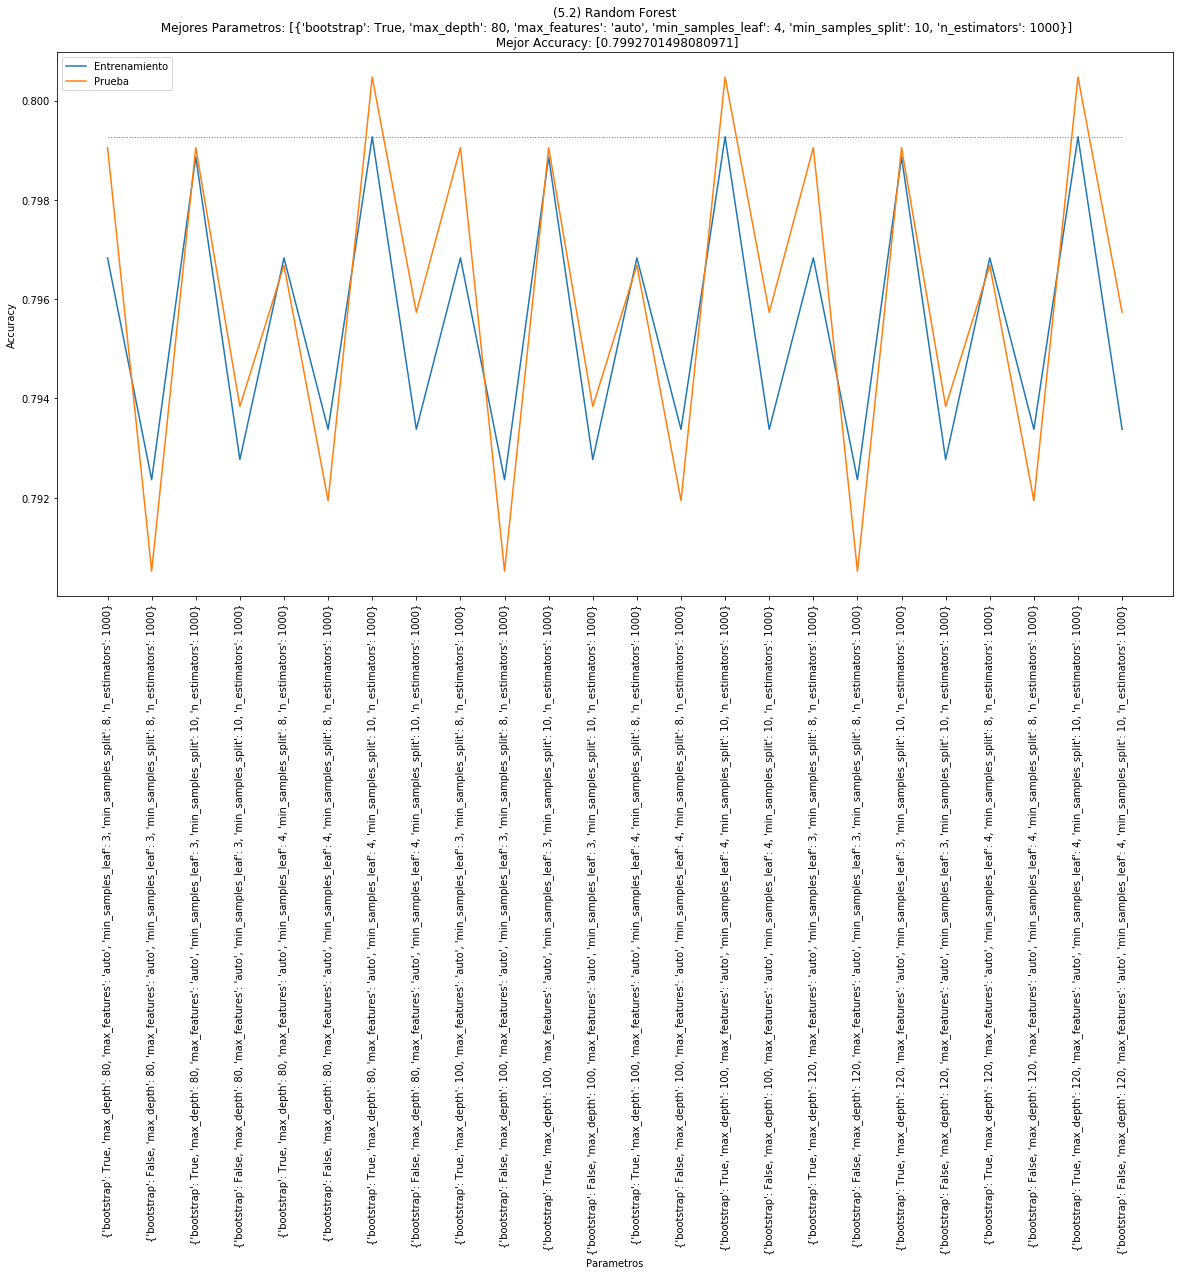

In [156]:
# Usaremos solo la data obtenida en cv_results
dataFrame = cv_results
dataFrame = dataFrame.sort_values(by=['param_max_depth', 'param_min_samples_leaf', 
                                      'param_min_samples_split', 'param_n_estimators'])

# Corremos la función que grafica la data de entrenamiento vs prueba
plot_train_test(dataFrame, modelName)

### (5.3) XGBoost
**1.-** En este punto crearemos un modelo XGBoost
###### Hiperparámetros:
* **Learning_rate:** Es la reducción que se hace en cada paso. Si realiza 1 paso a eta = 1.00, el peso del paso es 1.00. Si realiza 1 paso a eta = 0.25, el peso del paso es 0.25.
* **Max_depth:** Profundidad máxima de un árbol. El aumento de este valor hace que el modelo sea más complejo y que se sobreajuste con más probabilidad.
* **Gamma:** La reducción de pérdida mínima necesaria para realizar una partición mayor en un nodo de hoja del árbol. Conforme mayor sea, más conservador será el algoritmo.
* **Colsample_bytree:** Proporción de la submuestra de columnas cuando se construye cada árbol.

In [11]:
#!pip install xgboost

In [218]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Generamos una variable con el nobre del modelo
modelNumber = '5.3'
modelType = 'XGBoost'
modelName = '(' + modelNumber + ') ' + modelType

# Inicializamos los parametros que se usaran para evaluar los modelos de Random Forest
param_grid = {
    'learning_rate': [0.15, 0.20] ,
    'max_depth': [5, 6, 7, 8],
    'gamma': [0.4, 0.6],
    'colsample_bytree': [0.4],
    'n_estimators': [200],
    'objective': ['binary:logistic']
}

# Inicializamos el modelo de XGBoost
xgb_cl = xgb.XGBClassifier(seed=setSeed)

**2.-** Correremos todos los parametros definidos en el punto anterior usando la función de GridSearch, con la finalidad de obtener el mejor modelo. Además generaremos una estimación de los scores por cada uno de los parametros usando la data de prueba

In [219]:
# Incializamos in GridSearch para definir los mejores parametro
xgb_cl_cv = GridSearchCV(xgb_cl, param_grid, cv = crossValidation)
# Ajustamos la data de entrenamiento
xgb_cl_cv.fit(X_train, y_train)

# Generamos una lista vacia que contendra las evaluaciones de prueba de cada uno de los modelos
test_sc = list()
parameters = xgb_cl_cv.cv_results_['params']

# Hacemos un loop para iterar sobre todos los parametros
for value in parameters:
    # Creamos el modelo y lo ajustamos
    xgb_cl = xgb.XGBClassifier(seed=setSeed, **value)
    xgb_cl.fit(X_train, y_train)
    # Agregamos los resultados de nuestros scores a nuestras listas
    test_sc.append(xgb_cl.score(X_test, y_test))

**3.-** Una vez obtenidos los resultados del GridSearch y la data de prueba generaremos un data frame con todos los resultados y obtendremos el top 3 de los modelos para contrastarlo los en los resultados

In [220]:
# Generamos el data frame de los resultados
cv_results = pd.DataFrame(xgb_cl_cv.cv_results_)

# Generamos una variable llamada train_sc que contendra los scores de entrenamiento
cv_results['train_sc'] = cv_results['mean_test_score']

# Generamos una variable llamada test_sc que contendra los scores de prueba
cv_results['test_sc'] = test_sc

# Ordenamos los scores de mayor a menor para poder tener un criterio de selección 
# en caso de empate en la variable rank_score_test
cv_results = cv_results.sort_values(by=['train_sc', 'test_sc'], 
                                    ascending=[False, False]).reset_index(drop=True)
cv_results['rank'] = cv_results.index +  1

# Generamos una variable llamada model que tendra el nombre del modelo y ranking
cv_results['x1'] = ['('+ modelNumber +'.'] * cv_results.shape[0]
cv_results['x2'] = [') '+ modelType] * cv_results.shape[0]
cv_results['model'] = cv_results['x1'] + cv_results['rank'].astype(str) + cv_results['x2']

# Seleccionamos las variables y el orden en que se guardara nuestro data frame
cv_results = cv_results[['model', 'rank', 'param_learning_rate', 'param_max_depth',
                         'param_min_child_weight', 'param_gamma', 'param_colsample_bytree',
                         'params', 'train_sc', 'test_sc']]

# Seleccionamos el top de los modelos usando la variable rank
xgb_cl_top3 = cv_results[cv_results['rank'] < 4]
xgb_cl_top3[['model', 'rank', 'params', 'train_sc', 'test_sc']]

,model,rank,params,train_sc,test_sc
0,(5.3.1) XGBoost,1,"{'colsample_bytree': 0.4, 'gamma': 0.4, 'learn...",0.794599,0.792417
1,(5.3.2) XGBoost,2,"{'colsample_bytree': 0.4, 'gamma': 0.6, 'learn...",0.793381,0.794787
2,(5.3.3) XGBoost,3,"{'colsample_bytree': 0.4, 'gamma': 0.6, 'learn...",0.793180,0.791943


**4.-** Graficaremos los resultados de cada uno de los parametros usando la data entrenamiento contra la data de prueba

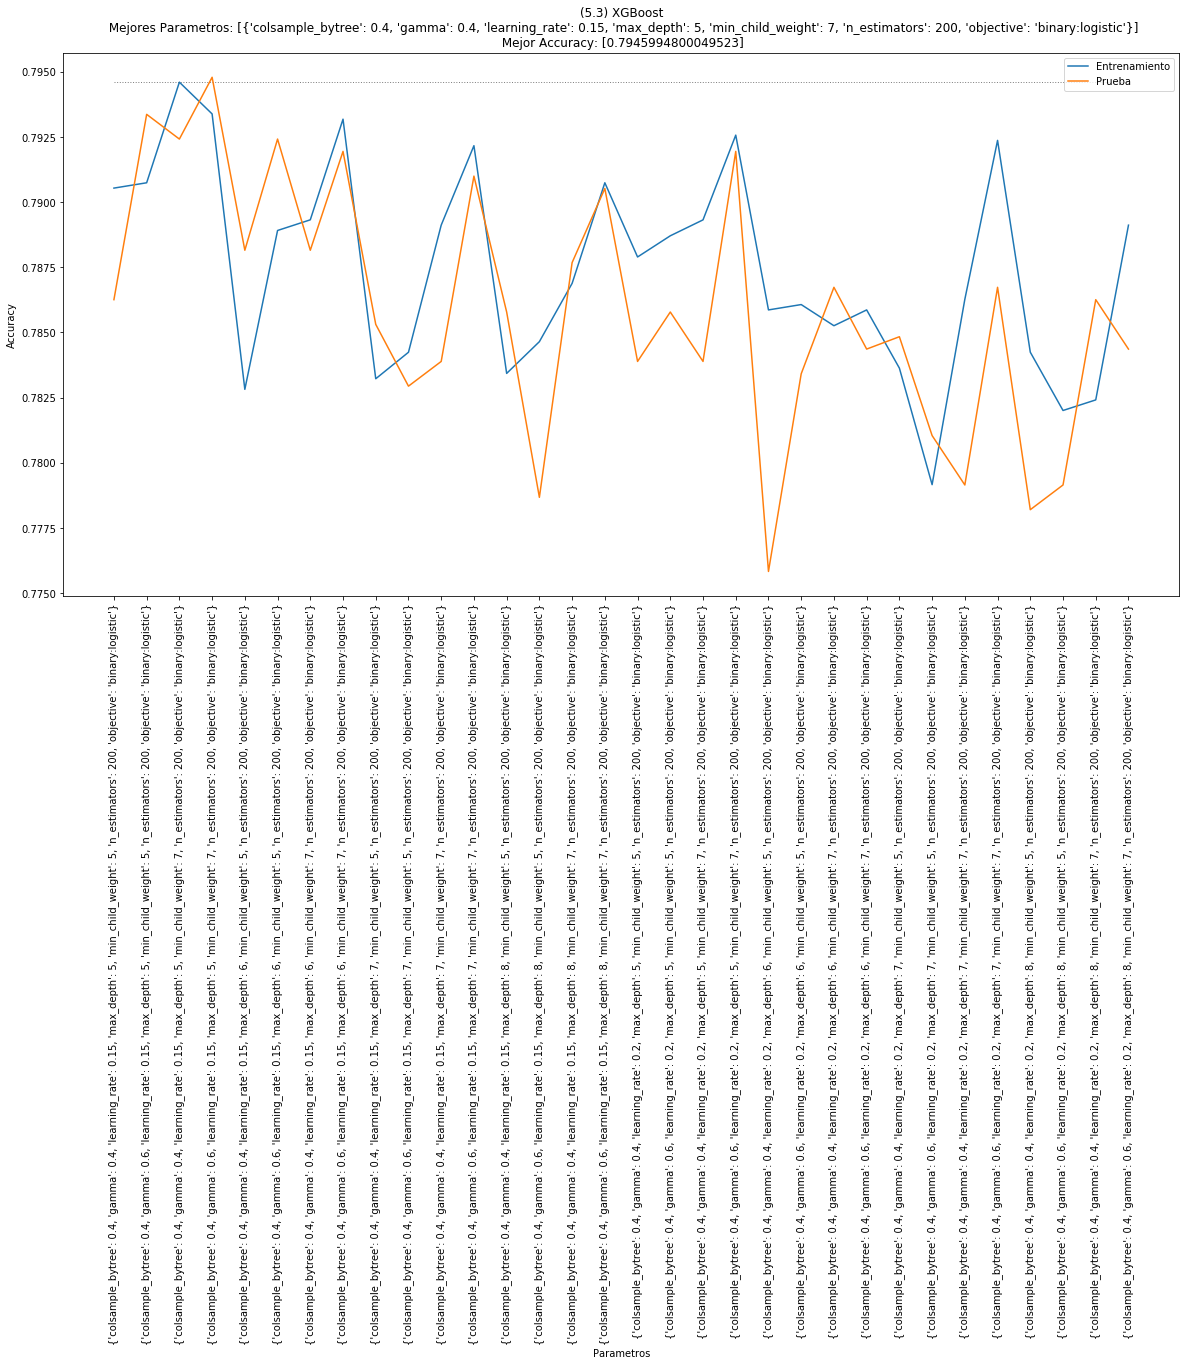

In [221]:
# Usaremos solo la data obtenida en cv_results
dataFrame = cv_results
dataFrame = dataFrame.sort_values(by=['param_learning_rate', 'param_max_depth', 'param_min_child_weight',
                                      'param_gamma', 'param_colsample_bytree'])

# Corremos la función que grafica la data de entrenamiento vs prueba
plot_train_test(dataFrame, modelName)

### (5.4) Maquinas de Soporte Vectorial - SVM
**1.-** En este punto creamos un modelo de Maquina de Soporte Vectorial
###### Hiperparámetros:
* **C:**
* **Gamma:**
* **Kernel:**

In [13]:
from sklearn.preprocessing import StandardScaler
# Generamos el modelo para estadarizar las X's
estandarizacion = StandardScaler()
estandarizacion.fit(X_train)
# Estandarizamos las X's y las guardamos en una variable transformada Z
Z_train = pd.DataFrame(estandarizacion.transform(X_train))
Z_test = pd.DataFrame(estandarizacion.transform(X_test))

In [234]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Generamos una variable con el nobre del modelo
modelNumber = '5.4'
modelType = 'Maquinas de Soporte Vectorial - SVM'
modelName = '(' + modelNumber + ') ' + modelType

# Inicializamos los parametros que se usaran para evaluar los modelos de Random Forest
param_grid = {
    'C': range(10,20),  
    'gamma': [0.001, 0.0001, 0.00001, 0.000001], 
    'kernel': ['rbf']
}

# Inicializamos el modelo de Maquina de Soporte Vectorial
svc = SVC(random_state=setSeed)

**2.-** Correremos todos los parametros definidos en el punto anterior usando la función de GridSearch, con la finalidad de obtener el mejor modelo. Además generaremos una estimación de los scores por cada uno de los parametros usando la data de prueba

In [ ]:
# Incializamos in GridSearch para definir los mejores parametro
svc_cv = GridSearchCV(svc, param_grid, cv = crossValidation)
# Ajustamos la data de entrenamiento
svc_cv.fit(X_train, y_train)

# Generamos una lista vacia que contendra las evaluaciones de prueba de cada uno de los modelos
test_sc = list()
parameters = svc_cv.cv_results_['params']

# Hacemos un loop para iterar sobre todos los parametros
for value in parameters:
    # Creamos el modelo y lo ajustamos
    svc = SVC(random_state=setSeed, **value)
    svc.fit(X_train, y_train)
    # Agregamos los resultados de nuestros scores a nuestras listas
    test_sc.append(svc.score(X_test, y_test))

**3.-** Una vez obtenidos los resultados del GridSearch y la data de prueba generaremos un data frame con todos los resultados y obtendremos el top 3 de los modelos para contrastarlo los en los resultados

In [ ]:
# Generamos el data frame de los resultados
cv_results = pd.DataFrame(svc_cv.cv_results_)

# Generamos una variable llamada train_sc que contendra los scores de entrenamiento
cv_results['train_sc'] = cv_results['mean_test_score']

# Generamos una variable llamada test_sc que contendra los scores de prueba
cv_results['test_sc'] = test_sc

# Ordenamos los scores de mayor a menor para poder tener un criterio de selección 
# en caso de empate en la variable rank_score_test
cv_results = cv_results.sort_values(by=['train_sc', 'test_sc'], 
                                    ascending=[False, False]).reset_index(drop=True)
cv_results['rank'] = cv_results.index +  1

# Generamos una variable llamada model que tendra el nombre del modelo y ranking
cv_results['x1'] = ['('+ modelNumber +'.'] * cv_results.shape[0]
cv_results['x2'] = [') '+ modelType] * cv_results.shape[0]
cv_results['model'] = cv_results['x1'] + cv_results['rank'].astype(str) + cv_results['x2']

# Seleccionamos las variables y el orden en que se guardara nuestro data frame
cv_results = cv_results[['model', 'rank', 'param_C', 'param_gamma', 'param_kernel',
                         'params', 'train_sc', 'test_sc']]

# Seleccionamos el top de los modelos usando la variable rank
svc_top3 = cv_results[cv_results['rank'] < 4]
svc_top3[['model', 'rank', 'params', 'train_sc', 'test_sc']]

**4.-** Graficaremos los resultados de cada uno de los parametros usando la data entrenamiento contra la data de prueba

In [ ]:
# Usaremos solo la data obtenida en cv_results
dataFrame = cv_results
dataFrame = dataFrame.sort_values(by=['param_C', 'param_gamma'])

# Corremos la función que grafica la data de entrenamiento vs prueba
plot_train_test(dataFrame, modelName)

## (6) Evaluación de Modelos

**1.-** En este punto evaluaremos las metricas de los modelos, para determinar cual es el mejor.

**Accuracy:** Mide el porcentaje de casos que el modelo ha acertado.

$$Accuracy=\frac{(TP + TN)}{(TP + TN + FP + FN)}$$

**Precision:** Mide la calidad del modelo. 

$$Precision=\frac{TP}{(TP + FP)}$$

**Recall:** Informa sobre la cantidad que el modelo es capaz de identificar. 

$$Recall=\frac{TP}{(TP + FN)}$$

**F1-Score:** Compara el rendimiento combinado de la precisión y la exhaustividad.

$$F1Score=2*\frac{(Precision * Recall)}{(Precision + Recall)}$$


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns

def plot_cm(confusion_matrix, score, name):
    cts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
    per = [("{0:.2%}").format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    labels = [f"\n{x1}\n{x2}\n" for x1, x2 in zip(cts, per)]
    labels = np.asarray(labels).reshape(2, 2)
    classNames = ['Churn','No Churn']
    tick_marks = np.arange(0,3)
    annot_kws = {"size": 12, "ha": 'center',"va": 'center'}
    plt.figure(figsize = (6,3))
    sns.heatmap(confusion_matrix, annot = labels, fmt = "",
                cmap = 'Blues', cbar = False,  annot_kws = annot_kws, color='black')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title((name + '\nAcc Score: {0}'.format(round(score, 3))+'\n'))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    return plt.show()

**2.-** Generaremos una matriz de confusión por cada uno de los modelos evaluados

In [ ]:
# TODO -->

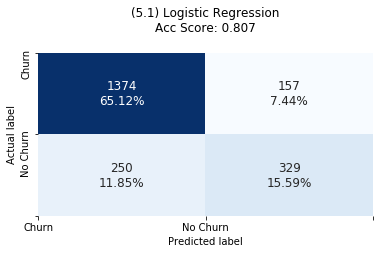

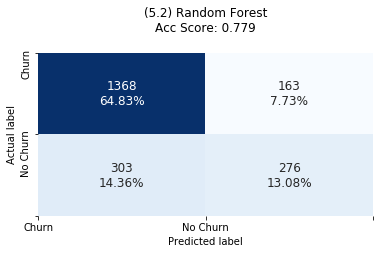

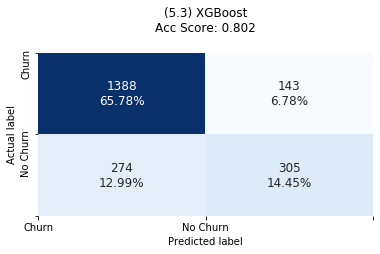

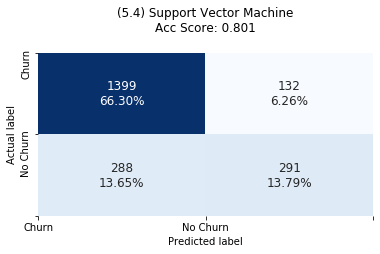

In [16]:
# Creamos las y's estimadas
lr_y_pred_1 =
rf_y_pred_1 =
xgb_y_pred_1 =
svc_y_pred_1 =


parameters = {'models':[lr_y_pred_1, lr_y_pred_2, lr_y_pred_3,
                        rf_y_pred_1, rf_y_pred_2, rf_y_pred_3,
                        xgb_y_pred_1, xgb_y_pred_2, xgb_y_pred_3,
                        svc_y_pred_1, svc_y_pred_2, svc_y_pred_3],
              'names':[lr_top3[0],
                       rf_cl_top3[0],
                       xgb_cl_top3[0],
                       svc_top3[0],]}

for i in range(0,4):
    cm = confusion_matrix(y_test, parameters['models'][i])
    score = accuracy_score(y_test, parameters['models'][i])
    plot_cm(cm, score, parameters['names'][i])
    plt.show()    


**3.-** Generamos una tabla resumen con todos los modelos evaluados

In [17]:
model_performances = pd.DataFrame()
for i in range(0,4):
    df = pd.DataFrame({"Model"           : [parameters['names'][i]],
                       "Accuracy_score"  : [accuracy_score(y_test, parameters['models'][i])],
                       "Recall_score"    : [recall_score(y_test, parameters['models'][i])],
                       "Precision"       : [precision_score(y_test, parameters['models'][i])],
                       "f1_score"        : [f1_score(y_test, parameters['models'][i])]
                      })
    model_performances  = pd.concat([model_performances, df])
model_performances.reset_index(drop=True)

,Model,Accuracy_score,Recall_score,Precision,f1_score
0,(5.1) Logistic Regression,0.807109,0.568221,0.676955,0.617840
1,(5.2) Random Forest,0.779147,0.476684,0.628702,0.542240
2,(5.3) XGBoost,0.802370,0.526770,0.680804,0.593963
3,(5.4) Support Vector Machine,0.800948,0.502591,0.687943,0.580838


## (7) Referencias
###### General
* [Telecom Customer Churn Prediction Notebook](https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction)
* [Ejercicios Aprendizaje Supervisado](https://github.com/jorgeo80/UP_MCD/blob/master/PythonExercises/ML/001_Supervised_Learning_scikit-learn.py)
* [Ejercicios de Clasificadores Lineales](https://github.com/jorgeo80/UP_MCD/blob/master/PythonExercises/ML/004_ML_Tree-Based_Models.py)

###### Regresión Logistica
* [Regularizacion Lasso y Ridge](https://iartificial.net/regularizacion-lasso-l1-ridge-l2-y-elasticnet/)
* [Notas Clase 5 - Regresión Logística](https://github.com/jorgeo80/UP_MCD/blob/master/MachineLearning/S5.3-RegLogistica.ipynb)

###### Random Forest
* [Random Forest Hiperparámetros](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)
* [Ejercicios Arboles de Decisión](https://github.com/jorgeo80/UP_MCD/blob/master/PythonExercises/ML/004_ML_Tree-Based_Models.py)

###### XGBoost
* [XGBoost Ajuste de Hiperparámetros (analyticsvidhya.com)](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)
* [XGBoost Ajuste de Hiperparámetros (towardsdatascience.com)](https://towardsdatascience.com/doing-xgboost-hyper-parameter-tuning-the-smart-way-part-1-of-2-f6d255a45dde)
* [XGBoost Ajuste de Hiperparámetros (blog.cambridgespark.com)](https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f)
* [XBoost Hiperparámetros](https://docs.aws.amazon.com/es_es/sagemaker/latest/dg/xgboost_hyperparameters.html)
* [Ejercicios XGBoost](https://github.com/jorgeo80/UP_MCD/blob/master/PythonExercises/ML/006_Extreme_Gradient_Boosting_XGBoost.py)

###### Maquinas de Soporte Vectorial
* [Ajuste de Hiperparámetros para Maquinas de Soporte Vectorial](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.107.1325&rep=rep1&type=pdf)
* [Hiperparámetros SVM](https://medium.com/analytics-vidhya/hyperparameter-tuning-an-svm-a-demonstration-using-hyperparameter-tuning-cross-validation-on-96b05db54e5b)
* [Notas Clase 6 - Suport Vector Machine](https://github.com/jorgeo80/UP_MCD/blob/master/MachineLearning/S6-SVM.ipynb)